# Exercise 3

#### Plan:

Use the CPS-ORG files from exercise 2, and generate certain variables.  

Estimate a log-Wage Regression, test for significance and look at the wage profile.

Add factor variables and later add cohort effects, test for significance.

Estimate Year-Specific Grade Coefficients and save them into a data set.

Plot the Relationship Between the Grade Coefficients and the 90-10 Differential (in logs).

In [1]:
cd "~/Eco 727 - Research Methods/Analysis"

C:\Users\Rafael\Eco 727 - Research Methods\Analysis


## A. Use the Edited CPS-ORG Files from Exercise 2

In [2]:
use "..\Data\cps2" // We load the cps data from exercise 2.

#### Keep observations without missing values for earnweek

In [3]:
count if earnweek == .
keep if earnweek !=.


  8,239

(8,239 observations deleted)


### Generating variables

In [4]:
/*Generating the real weekly wage */
summarize cpi if inlist(year, 2020) & inlist(month, 11), meanonly
scalar cpinov20=r(mean)
scalar list cpinov20
generate real_weekly_wage = cpinov20*earnweek/cpi // real weekly wage in Nov2020 dollars
summarize real_weekly_wage




  cpinov20 =    260.229



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
real_weekl~e |  6,256,784    933.1914    664.2087    .009998   4645.168


In [5]:
/*Generating the log of real weekly wage */
generate log_rwwage = log(real_weekly_wage)

In [6]:
/*Generating experience */
generate experience = age - grade - 6
replace experience = 0 if experience <0 // to ensure that we do not have negative values, we replace them with zero
summarize experience // To see that we begin at 0 years of experience



(20,669 real changes made)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  experience |  6,256,784    19.45984    12.32798          0         58


In [7]:
/*Generating experience squared */
generate experience_squared = experience*experience

In [8]:
/*Generating birthyear */
generate birthyear=year-age if inrange(month, 1, 6)
replace birthyear=year-age-1 if inrange(month, 7, 12)
summarize birthyear // We see that our max is 2002, which makes sense since our data captures 18 year old's in 2020.   


(3,138,811 missing values generated)

(3,138,811 real changes made)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   birthyear |  6,256,784    1961.128    15.35076       1917       2002


## B. Estimate a Simple log-Wage Regression

In [9]:
regress log_rwwage grade experience experience_squared [pw=earnwt]

(sum of wgt is 51,919,021,788.24)

Linear regression                               Number of obs     =  6,256,784
                                                F(3, 6256780)     >   99999.00
                                                Prob > F          =     0.0000
                                                R-squared         =     0.2322
                                                Root MSE          =     .68414

-------------------------------------------------------------------------------
              |               Robust
   log_rwwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
        grade |   .1102519   .0001307   843.65   0.000     .1099957     .110508
   experience |   .0575206   .0000988   582.45   0.000     .0573271    .0577142
experience_~d |   -.001005   2.32e-06  -434.07   0.000    -.0010095   -.0010005
        _cons |   4.526225    .001974  2292.95   0.0

We can observe an 11.03% percent increase in wages for each additional year of education. This is also called the rate of return to schooling. We also observe the combination between experience and experience squared given us an upward sloping concave wage profile. 

#### Test for the joint significance of the experience variables

In [10]:
testparm experience  experience_squared


 ( 1)  experience = 0
 ( 2)  experience_squared = 0

       F(  2,6256780) = 2.7e+05
            Prob > F =    0.0000


We can see the joint significance of the experience variables to be significant.

#### At how many years of experience does the wage profile peak?

In [11]:
display "The log-wage profile peaks at", -e(b)[1,2]/(2*e(b)[1,3]) , "years of experience.

The log-wage profile peaks at 28.617504 years of experience.


This is done by setting the derivative of log-wage with respect to experience equal to zero and solved for experience."

## C. Add Factor Variables.

In [12]:
/*The factor notation i.var allows us to test for factor variables, without having to create dummy variables.*/
regress log_rwwage grade experience experience_squared i.sex i.race i.region i.occuply i.industly i.year [pw=earnwt]

(sum of wgt is 51,919,021,788.24)

Linear regression                               Number of obs     =  6,256,784
                                                F(97, 6256686)    =   30560.82
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3951
                                                Root MSE          =     .60726

-------------------------------------------------------------------------------
              |               Robust
   log_rwwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
        grade |    .079633   .0001527   521.38   0.000     .0793337    .0799324
   experience |    .044896   .0000902   497.73   0.000     .0447192    .0450728
experience_~d |  -.0007751   2.07e-06  -375.32   0.000    -.0007791    -.000771
              |
          sex |
      female  |  -.2

        2016  |   .0086087   .0023765     3.62   0.000     .0039508    .0132667
        2017  |   .0206374   .0023966     8.61   0.000     .0159402    .0253346
        2018  |   .0262835    .002415    10.88   0.000     .0215501    .0310169
        2019  |   .0482371   .0024505    19.68   0.000     .0434342    .0530399
        2020  |   .0753317   .0026574    28.35   0.000     .0701233    .0805401
              |
        _cons |   5.511205   .0036735  1500.24   0.000     5.504005    5.518405
-------------------------------------------------------------------------------


We can observe that the first coefficients roughly remain the same, and observe the effect of the other variables. For example, females generally earn 29.72% less than males. We also see that being of any other race other than white, will typically earn less in wages. Except for a few such as asian only, white-american, etc. We can also see the effects of occupation and industry as well the year effects. 

#### Separately test for the joint significance of the race, region, occup, indust, and year effects

In [13]:
testparm i.race
testparm i.region    
testparm i.occuply
testparm i.industly
testparm i.year



 ( 1)  200.race = 0
 ( 2)  300.race = 0
 ( 3)  650.race = 0
 ( 4)  651.race = 0
 ( 5)  652.race = 0
 ( 6)  700.race = 0
 ( 7)  801.race = 0
 ( 8)  802.race = 0
 ( 9)  803.race = 0
 (10)  804.race = 0
 (11)  805.race = 0
 (12)  806.race = 0
 (13)  807.race = 0
 (14)  808.race = 0
 (15)  809.race = 0
 (16)  810.race = 0
 (17)  811.race = 0
 (18)  812.race = 0
 (19)  813.race = 0
 (20)  814.race = 0
 (21)  815.race = 0
 (22)  816.race = 0
 (23)  817.race = 0
 (24)  818.race = 0
 (25)  819.race = 0
 (26)  820.race = 0
 (27)  830.race = 0

       F( 27,6256686) =  219.42
            Prob > F =    0.0000


 ( 1)  12.region = 0
 ( 2)  21.region = 0
 ( 3)  22.region = 0
 ( 4)  31.region = 0
 ( 5)  32.region = 0
 ( 6)  33.region = 0
 ( 7)  41.region = 0
 ( 8)  42.region = 0

       F(  8,6256686) = 2377.64
            Prob > F =    0.0000


 ( 1)  2.occuply = 0
 ( 2)  3.occuply = 0
 ( 3)  4.occuply = 0
 ( 4)  5.occuply = 0
 ( 5)  6.occuply = 0
 ( 6)  7.occuply = 0
 ( 7)  8.occuply = 0
 ( 8)  

Each F test rejects the null hypothesis. Race, region, occupation, industry and year effects are statistically significant.

## D. Adding Cohort Effects

In [14]:
/* We add i.birthyear as a cohort effect*/
regress log_rwwage grade experience experience_squared i.birthyear i.sex i.race i.region i.year i.occuply i.industly  [pw=earnwt] 
testparm i.birthyear
testparm i.year


(sum of wgt is 51,919,021,788.24)

Linear regression                               Number of obs     =  6,256,784
                                                F(182, 6256601)   =   16418.87
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3964
                                                Root MSE          =     .60659

-------------------------------------------------------------------------------
              |               Robust
   log_rwwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
        grade |   .0684147   .0005791   118.14   0.000     .0672797    .0695497
   experience |   .0318731   .0005668    56.23   0.000     .0307621     .032984
experience_~d |  -.0007271   2.24e-06  -324.55   0.000    -.0007315   -.0007227
              |
    birthyear |
        1918  |  -.

hawaiian/p..  |  -.0232023   .0070134    -3.31   0.001    -.0369483   -.0094562
other (sin..  |  -.0612001    .003124   -19.59   0.000    -.0673231   -.0550771
 white-black  |  -.0112485   .0079999    -1.41   0.160     -.026928     .004431
white-amer..  |   -.053931   .0056565    -9.53   0.000    -.0650176   -.0428444
 white-asian  |   .0160972   .0096231     1.67   0.094    -.0027638    .0349582
white-hawa..  |   .0245507   .0182945     1.34   0.180     -.011306    .0604073
black-amer..  |  -.0898382   .0159275    -5.64   0.000    -.1210556   -.0586208
 black-asian  |   .0624133   .0265685     2.35   0.019     .0103399    .1144867
black-hawa..  |  -.1603425   .0720182    -2.23   0.026    -.3014955   -.0191895
american i..  |  -.0257297   .0694058    -0.37   0.711    -.1617626    .1103032
asian-hawa..  |  -.0346001   .0186576    -1.85   0.064    -.0711683    .0019681
white-blac..  |  -.0570019   .0218381    -2.61   0.009    -.0998039      -.0142
white-blac~n  |   .1167815   .0508647   

 (31)  1948.birthyear = 0
 (32)  1949.birthyear = 0
 (33)  1950.birthyear = 0
 (34)  1951.birthyear = 0
 (35)  1952.birthyear = 0
 (36)  1953.birthyear = 0
 (37)  1954.birthyear = 0
 (38)  1955.birthyear = 0
 (39)  1956.birthyear = 0
 (40)  1957.birthyear = 0
 (41)  1958.birthyear = 0
 (42)  1959.birthyear = 0
 (43)  1960.birthyear = 0
 (44)  1961.birthyear = 0
 (45)  1962.birthyear = 0
 (46)  1963.birthyear = 0
 (47)  1964.birthyear = 0
 (48)  1965.birthyear = 0
 (49)  1966.birthyear = 0
 (50)  1967.birthyear = 0
 (51)  1968.birthyear = 0
 (52)  1969.birthyear = 0
 (53)  1970.birthyear = 0
 (54)  1971.birthyear = 0
 (55)  1972.birthyear = 0
 (56)  1973.birthyear = 0
 (57)  1974.birthyear = 0
 (58)  1975.birthyear = 0
 (59)  1976.birthyear = 0
 (60)  1977.birthyear = 0
 (61)  1978.birthyear = 0
 (62)  1979.birthyear = 0
 (63)  1980.birthyear = 0
 (64)  1981.birthyear = 0
 (65)  1982.birthyear = 0
 (66)  1983.birthyear = 0
 (67)  1984.birthyear = 0
 (68)  1985.birthyear = 0
 (69)  1986.

Including birthyear allows one to observe estimates of the wage profile over the course of one's career. Using 1917 as the ommited variable one can see that almost all have negative coefficients for birthyear, telling us that their wage profile compared to 1917, was lower over the course of their careers. With a close inspection we see that the amounts fluctuate and are even positive (year 1921) for people born before 1930's. This is most likely b/c people born from 1920 to 1930's enjoyed the post economic boom from WW2. However in the long run the fluctuation is not so apparent and the negatives coeficients increase in magnitude. Seperately we test for significance find cohort effects to be stastiscally significant.

## E. Estimate Year-Specific Grade Coefficients

In [15]:
regress log_rwwage i.year#c.grade experience experience_squared i.sex i.race i.region i.year i.occuply i.industly [pw=earnwt]

(sum of wgt is 51,919,021,788.24)

Linear regression                               Number of obs     =  6,256,784
                                                F(135, 6256648)   =   22181.31
                                                Prob > F          =     0.0000
                                                R-squared         =     0.3959
                                                Root MSE          =     .60685

-------------------------------------------------------------------------------
              |               Robust
   log_rwwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
 year#c.grade |
        1982  |   .0538976   .0005879    91.68   0.000     .0527455    .0550498
        1983  |   .0572354   .0006037    94.81   0.000     .0560522    .0584185
        1984  |   .0600163    .000608    98.71   0.000     .0588247     .061208
        1985  |   .0621956   .000609

        1998  |  -.3973762   .0123314   -32.22   0.000    -.4215453   -.3732071
        1999  |  -.3830575    .011957   -32.04   0.000    -.4064929   -.3596221
        2000  |  -.3501872   .0120142   -29.15   0.000    -.3737346   -.3266398
        2001  |  -.3638035   .0122952   -29.59   0.000    -.3879016   -.3397054
        2002  |  -.3607597    .011852   -30.44   0.000    -.3839893   -.3375301
        2003  |  -.3166534    .012539   -25.25   0.000    -.3412293   -.2920775
        2004  |  -.3196199   .0122003   -26.20   0.000    -.3435322   -.2957077
        2005  |  -.3486059   .0120142   -29.02   0.000    -.3721534   -.3250585
        2006  |  -.3317893   .0119214   -27.83   0.000    -.3551547   -.3084239
        2007  |  -.3533323   .0122958   -28.74   0.000    -.3774317   -.3292329
        2008  |  -.3906313   .0125597   -31.10   0.000    -.4152479   -.3660148
        2009  |  -.4235598   .0128048   -33.08   0.000    -.4486567   -.3984628
        2010  |  -.4652175    .012901   

### Saving grade coefficients to a data set

In [16]:
matrix b=get(_b) // row vector of coefficient estimates
matrix c=b[1, 1..39]' // transpose to a column vector
svmat double c, names(col) // add the coefficients to the data set
rename y1 grade_coeff
keep grade_coeff           // drop all other variables
drop if grade_coeff==.     // drop the millions of observations, keeping only one observation per coefficient
generate year=1982 if _n==1
replace  year=1981+_n if year==.
order year grade_coeff
list, noobs
save "../Data/grade_coefficients", replace







(6,256,745 observations deleted)

(38 missing values generated)

(38 real changes made)



  +------------------+
  | year   grade_c~f |
  |------------------|
  | 1982   .05389763 |
  | 1983   .05723536 |
  | 1984   .06001635 |
  | 1985   .06219563 |
  | 1986   .06567955 |
  |------------------|
  | 1987     .067608 |
  | 1988    .0662068 |
  | 1989   .07271403 |
  | 1990   .07371945 |
  | 1991    .0738079 |
  |------------------|
  | 1992    .0789928 |
  | 1993    .0808738 |
  | 1994    .0842475 |
  | 1995   .08305043 |
  | 1996   .08179143 |
  |------------------|
  | 1997   .08081069 |
  | 1998   .08350089 |
  | 1999   .08388956 |
  | 2000   .08250772 |
  | 2001   .08370958 |
  |------------------|
  | 2002   .08365446 |
  | 2003   .08035144 |
  | 2004   .08063941 |
  | 2005   .08216302 |
  | 2006   .08123923 |
  |------------------|
  | 2007   .08261485 |
  | 2008   .08456154 |
  | 2009   .08656802 |
  | 2010   .08879393 |
  | 2011   .08845721 |
  |------------------|
  | 20

## F. Plot the Relationship Between the Grade Coefficients & the 90-10 Differential (in logs)

### Creating the 90-10 log wage differential

In [17]:
use if inlist(percentile, 10, 90) using "../Data/wage_percentiles"
generate log_diff=100*(log(real_weekly_wage)-log(real_weekly_wage[_n-1])) if year==year[_n-1] & percentile==90
drop if log_diff==.
drop percentile real_weekly_wage



(39 missing values generated)

(39 observations deleted)



### Merging with the grade coefficients data set

In [18]:
merge 1:1 year using "../Data/grade_coefficients", nogenerate
replace grade_coeff=100*grade_coeff
list 


(note: variable year was int, now float to accommodate using data's values)

    Result                           # of obs.
    -----------------------------------------
    not matched                             0
    matched                                39  
    -----------------------------------------

(39 real changes made)


     +-----------------------------+
     | year   log_diff   grade_c~f |
     |-----------------------------|
  1. | 1982   173.3826   5.3897633 |
  2. | 1983   178.0809   5.7235364 |
  3. | 1984   179.1759   6.0016346 |
  4. | 1985    180.055   6.2195626 |
  5. | 1986   181.6143   6.5679551 |
     |-----------------------------|
  6. | 1987   179.1959      6.7608 |
  7. | 1988   180.6004   6.6206804 |
  8. | 1989   179.2675   7.2714032 |
  9. | 1990    175.366   7.3719455 |
 10. | 1991   176.0674   7.3807901 |
     |-----------------------------|
 11. | 1992     177.85   7.8992802 |
 12. | 1993   179.3147   8.0873801 |
 13. | 1994   184.7806   8.4247497

### Plotting the two series

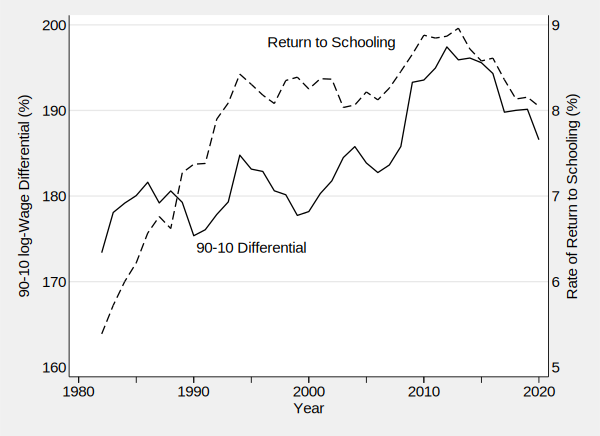




(file ..\Analysis\Results\return_to_schooling.pdf written in PDF format)


In [20]:
line log_diff y, yaxis(1) || line grade_coeff y, yaxis(2) ||, ///
xtitle(Year) xlabel(1980(10)2020) xtick(1980(5)2015) ///
ytitle("90-10 log-Wage Differential (%)", axis(1)) ylabel(160(10)200, angle(0) noticks axis(1)) ///  
ytitle("Rate of Return to Schooling (%)", axis(2)) ylabel(5(1)9, angle(0) noticks axis(2)) ///
text(174 1995 "90-10 Differential") text(198 2002 "Return to Schooling") ///
legend(off) scheme(sj) name(graph1, replace)
graph export "..\Analysis\Results\return_to_schooling.pdf", as(pdf) replace

Based on the graph we observe that the return to schooling ranges from 5% to a high 9% and (the 90-10 percentile) wage differental ranges from 170% to 200%. We can observe that the return to schooling has actually been increasing with time. Similarly, the wage differential has been increasing as well, and can potentially be explained by the increasing rate of return to schooling. Thus, the increasing rate of return to schooling serving to explain the increase in wage differentials.

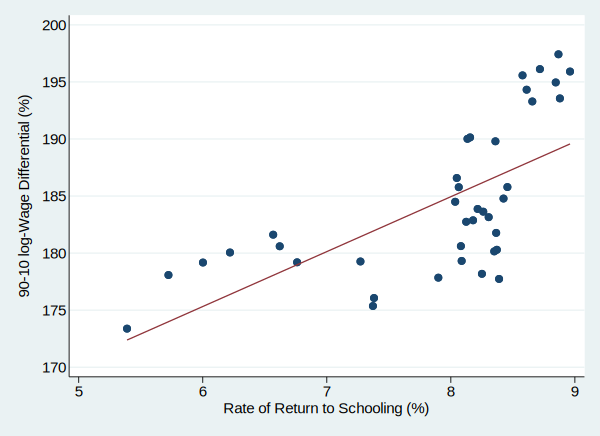




(file ..\Analysis\Results\return_to_schooling_scatter.pdf written in PDF format)


In [21]:
scatter log_diff grade_coeff || lfit log_diff grade_coeff ||, ///
xtitle(Rate of Return to Schooling (%)) xlabel(5(1)9) ///
ytitle("90-10 log-Wage Differential (%)") ylabel(170(5)200, angle(0) noticks) ///
legend(off) scheme(s2color) name(graph2, replace)
graph export "..\Analysis\Results\return_to_schooling_scatter.pdf", as(pdf) replace

This graph further plots the relationship between the (90-10 percentile)wage differential and the rate of return to schooling, futher confirming that as the rate of return to schooling increases, the wage differential increases as well. 